# Project 2
## Step 1: Exploring your data.

##### Load your data in using Pandas and start to explore. Save all of your early exploration code here and include in your final submission.

In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import pylab as P
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline

In [2]:
bb = pd.read_csv("billboard.csv")

In [335]:
bb.tail()

,artist.inverted,track,song_seconds,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,x4th.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
312,Ghostface Killah,Cherchez LaGhost,184,R&B,2000-08-05,2000-08-05,98,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313,"Smith, Will",Freakin' It,238,Rap,2000-02-12,2000-02-12,99,99,99,99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
314,Zombie Nation,Kernkraft 400,210,Rock,2000-09-02,2000-09-02,99,99,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
315,"Eastsidaz, The",Got Beef,238,Rap,2000-07-01,2000-07-01,99,99,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
316,Fragma,Toca's Miracle,202,R&B,2000-10-28,2000-10-28,99,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#making sure the data is all in 2000
bb["year"].value_counts()

2000    317
Name: year, dtype: int64

In [5]:
#checking discrepancies in genres
bb["genre"].value_counts()

Rock           103
Country         74
Rap             58
Rock'n'roll     34
R&B             13
R & B           10
Pop              9
Latin            9
Electronica      4
Gospel           1
Jazz             1
Reggae           1
Name: genre, dtype: int64

In [6]:
#checking what the "*" are categorized as compared to week 1
print bb["x1st.week"].describe()
print bb["x2nd.week"].describe()

count    317.000000
mean      79.958991
std       14.686865
min       15.000000
25%       74.000000
50%       81.000000
75%       91.000000
max      100.000000
Name: x1st.week, dtype: float64
count     317
unique     73
top        72
freq       12
Name: x2nd.week, dtype: object


In [7]:
#making sure that the artist names make sense
bb["artist.inverted"].value_counts().sort_index().head()

2 Pac           1
2Ge+her         1
3 Doors Down    2
504 Boyz        1
98�             1
Name: artist.inverted, dtype: int64

In [8]:
##### Write a brief description of your data, and any interesting observations you've made thus far. 

This data seems to describe the top 100 Billboard rank of top songs in 2000. Few observations and discrepancies with the data listed below:
- There seems to be a ton of missing data in the individual columns by weeks. In order to properly analyze the data, this data has to be made more digestible. This could be done by adding a column for peak position, and another for the duration.
- There's duplicative genres of different names. These would need to be converted.
- The date entered, date peaked and time columns do not appear to be in the proper date time format.
- The data *seems* to be sorted by duration that it was on the Billboard top 100, but currently unclear. 

## Step 2: Clean your data.

##### Do some rudimentary cleaning. Rename any columns that are poorly named, shorten any strings that may be too long, fill in any missing values. Explain your rationale for the way you choose to "impute" the missing data.

In [9]:
bb['date.entered'] = pd.to_datetime(bb['date.entered'])
bb['date.entered'].head()

0   2000-09-23
1   2000-02-12
2   1999-10-23
3   2000-08-12
4   2000-08-05
Name: date.entered, dtype: datetime64[ns]

In [10]:
bb['date.peaked']=pd.to_datetime(bb['date.peaked'])
bb['date.peaked'].head()

0   2000-11-18
1   2000-04-08
2   2000-01-29
3   2000-09-16
4   2000-10-14
Name: date.peaked, dtype: datetime64[ns]

In [11]:
bb.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,"3,38,00 AM",Rock,2000-09-23,2000-11-18,78,63,49,...,*,*,*,*,*,*,*,*,*,*
1,2000,Santana,"Maria, Maria","4,18,00 AM",Rock,2000-02-12,2000-04-08,15,8,6,...,*,*,*,*,*,*,*,*,*,*
2,2000,Savage Garden,I Knew I Loved You,"4,07,00 AM",Rock,1999-10-23,2000-01-29,71,48,43,...,*,*,*,*,*,*,*,*,*,*
3,2000,Madonna,Music,"3,45,00 AM",Rock,2000-08-12,2000-09-16,41,23,18,...,*,*,*,*,*,*,*,*,*,*
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),"3,38,00 AM",Rock,2000-08-05,2000-10-14,57,47,45,...,*,*,*,*,*,*,*,*,*,*


In [12]:
def timeconverterAM(string):
    newstring = string.replace(" AM", "")
    newnewstring = newstring.replace(",", ":")
    return newnewstring

bb["time"]=bb["time"].apply(timeconverterAM)

In [13]:
type(bb["time"][1])

str

In [14]:
bb.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38:00,Rock,2000-09-23,2000-11-18,78,63,49,...,*,*,*,*,*,*,*,*,*,*
1,2000,Santana,"Maria, Maria",4:18:00,Rock,2000-02-12,2000-04-08,15,8,6,...,*,*,*,*,*,*,*,*,*,*
2,2000,Savage Garden,I Knew I Loved You,4:07:00,Rock,1999-10-23,2000-01-29,71,48,43,...,*,*,*,*,*,*,*,*,*,*
3,2000,Madonna,Music,3:45:00,Rock,2000-08-12,2000-09-16,41,23,18,...,*,*,*,*,*,*,*,*,*,*
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38:00,Rock,2000-08-05,2000-10-14,57,47,45,...,*,*,*,*,*,*,*,*,*,*


In [16]:
def timetoseconds(time):
    newtime = time.split(":")
    seconds = (60*int(newtime[0])) + int(newtime[1])
    return seconds

timetoseconds("3:38:00")

218

In [17]:
bb["time"] = bb["time"].apply(timetoseconds)

In [18]:
bb["time"].head()

0    218
1    258
2    247
3    225
4    218
Name: time, dtype: int64

In [19]:
def changernb(string):
    if "R & B" in string:
        newstring = string.replace(" ", "")
        return newstring
    else:
        return string

bb["genre"] = bb["genre"].apply(changernb)
bb["genre"].value_counts()

Rock           103
Country         74
Rap             58
Rock'n'roll     34
R&B             23
Pop              9
Latin            9
Electronica      4
Gospel           1
Jazz             1
Reggae           1
Name: genre, dtype: int64

In [20]:
def rocknrollchanger(string):
    if "Rock'n'roll" in string:
        newstring = string.replace("'n'roll", "")
        return newstring
    else:
        return string

bb["genre"] = bb["genre"].apply(rocknrollchanger)
bb["genre"].value_counts()

Rock           137
Country         74
Rap             58
R&B             23
Pop              9
Latin            9
Electronica      4
Gospel           1
Jazz             1
Reggae           1
Name: genre, dtype: int64

In [21]:
def asterisknan(xx):
    if xx == "*":
        return np.nan
    else:
        return xx

asterisknan("*")

nan

In [22]:
bb = bb.applymap(asterisknan)

In [23]:
#do not need the year since its the same
del bb["year"]

In [24]:
bb.head()

,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,x4th.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,Destiny's Child,Independent Women Part I,218,Rock,2000-09-23,2000-11-18,78,63,49,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Santana,"Maria, Maria",258,Rock,2000-02-12,2000-04-08,15,8,6,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Savage Garden,I Knew I Loved You,247,Rock,1999-10-23,2000-01-29,71,48,43,31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Madonna,Music,225,Rock,2000-08-12,2000-09-16,41,23,18,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),218,Rock,2000-08-05,2000-10-14,57,47,45,29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
bb = bb.rename(columns = {"time" : "song_seconds"})

In [26]:
bb.columns

Index([u'artist.inverted', u'track', u'song_seconds', u'genre',
       u'date.entered', u'date.peaked', u'x1st.week', u'x2nd.week',
       u'x3rd.week', u'x4th.week', u'x5th.week', u'x6th.week', u'x7th.week',
       u'x8th.week', u'x9th.week', u'x10th.week', u'x11th.week', u'x12th.week',
       u'x13th.week', u'x14th.week', u'x15th.week', u'x16th.week',
       u'x17th.week', u'x18th.week', u'x19th.week', u'x20th.week',
       u'x21st.week', u'x22nd.week', u'x23rd.week', u'x24th.week',
       u'x25th.week', u'x26th.week', u'x27th.week', u'x28th.week',
       u'x29th.week', u'x30th.week', u'x31st.week', u'x32nd.week',
       u'x33rd.week', u'x34th.week', u'x35th.week', u'x36th.week',
       u'x37th.week', u'x38th.week', u'x39th.week', u'x40th.week',
       u'x41st.week', u'x42nd.week', u'x43rd.week', u'x44th.week',
       u'x45th.week', u'x46th.week', u'x47th.week', u'x48th.week',
       u'x49th.week', u'x50th.week', u'x51st.week', u'x52nd.week',
       u'x53rd.week', u'x54th.week', u'x5

In [27]:
bb.head()

,artist.inverted,track,song_seconds,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,x4th.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,Destiny's Child,Independent Women Part I,218,Rock,2000-09-23,2000-11-18,78,63,49,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Santana,"Maria, Maria",258,Rock,2000-02-12,2000-04-08,15,8,6,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Savage Garden,I Knew I Loved You,247,Rock,1999-10-23,2000-01-29,71,48,43,31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Madonna,Music,225,Rock,2000-08-12,2000-09-16,41,23,18,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),218,Rock,2000-08-05,2000-10-14,57,47,45,29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [269]:
bb.describe()

,song_seconds,x1st.week,x66th.week,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
count,317.000000,317.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,242.425868,79.958991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,42.401618,14.686865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,156.000000,15.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,219.000000,74.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,236.000000,81.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,257.000000,91.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,470.000000,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Using Pandas' built in `melt` function, pivot the weekly ranking data to be long rather than wide. As a result, you will have removed the 72 'week' columns and replace it with two: Week and Ranking. There will now be multiple entries for each song, one for each week on the Billboard rankings.

In [29]:
bb_long = pd.melt(bb,
                  id_vars = ["artist.inverted", "track", "song_seconds", "genre", "date.entered", "date.peaked"],
                 var_name = 'week_from_entered',
                 value_name = 'rank')

bb_long.head()

,artist.inverted,track,song_seconds,genre,date.entered,date.peaked,week_from_entered,rank
0,Destiny's Child,Independent Women Part I,218,Rock,2000-09-23,2000-11-18,x1st.week,78
1,Santana,"Maria, Maria",258,Rock,2000-02-12,2000-04-08,x1st.week,15
2,Savage Garden,I Knew I Loved You,247,Rock,1999-10-23,2000-01-29,x1st.week,71
3,Madonna,Music,225,Rock,2000-08-12,2000-09-16,x1st.week,41
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),218,Rock,2000-08-05,2000-10-14,x1st.week,57


In [30]:
bb_long.sort_values("track").head()

,artist.inverted,track,song_seconds,genre,date.entered,date.peaked,week_from_entered,rank
7655,Nelly,(Hot S**t) Country Grammar,257,Rap,2000-04-29,2000-09-16,x25th.week,11
3217,Nelly,(Hot S**t) Country Grammar,257,Rap,2000-04-29,2000-09-16,x11th.week,37
11459,Nelly,(Hot S**t) Country Grammar,257,Rap,2000-04-29,2000-09-16,x37th.week,NaN
4802,Nelly,(Hot S**t) Country Grammar,257,Rap,2000-04-29,2000-09-16,x16th.week,17
22554,Nelly,(Hot S**t) Country Grammar,257,Rap,2000-04-29,2000-09-16,x72nd.week,NaN


In [31]:
bb_long["week_from_entered"] = bb_long["week_from_entered"].apply(lambda x: str(x).replace(".week", ""))
bb_long["week_from_entered"].head()

0    x1st
1    x1st
2    x1st
3    x1st
4    x1st
Name: week_from_entered, dtype: object

In [32]:
bb_long["week_from_entered"] = bb_long["week_from_entered"].apply(lambda x: x[1:3])

In [33]:
def convertweekentered(item):
    try:
        return int(str(item))
    except:
        return int(str(item[0]))

convertweekentered("76")

76

In [34]:
bb_long["week_from_entered"] = bb_long["week_from_entered"].apply(convertweekentered)

In [35]:
bb_long.sort_values("track").head()

,artist.inverted,track,song_seconds,genre,date.entered,date.peaked,week_from_entered,rank
7655,Nelly,(Hot S**t) Country Grammar,257,Rap,2000-04-29,2000-09-16,25,11
3217,Nelly,(Hot S**t) Country Grammar,257,Rap,2000-04-29,2000-09-16,11,37
11459,Nelly,(Hot S**t) Country Grammar,257,Rap,2000-04-29,2000-09-16,37,NaN
4802,Nelly,(Hot S**t) Country Grammar,257,Rap,2000-04-29,2000-09-16,16,17
22554,Nelly,(Hot S**t) Country Grammar,257,Rap,2000-04-29,2000-09-16,72,NaN


In [36]:
def convertintegerrank(item):
    try:
        return int(str(item))
    except:
        return item

convertintegerrank(np.nan)

nan

In [37]:
bb_long["rank"] = bb_long["rank"].apply(convertintegerrank)

## Step 3: Visualize your data.

##### Using a plotting utility of your choice (Tableau or python modules or both), create visualizations that will provide context to your data. There is no minimum or maximum number of graphs you should generate, but there should be a clear and consistent story being told. Give insights to the distribution, statistics, and relationships of the data. 

In [38]:
#which artists have the most songs on the billboard in 2000s
#what genre are they?

artist_song_count = bb.groupby(["artist.inverted", "genre"])["track"].count().to_frame("track_count")
artist_song_count.sort_values("track_count", ascending = False, inplace = True)
artist_song_count.reset_index(inplace = True)
artist_song_count

,artist.inverted,genre,track_count
0,Jay-Z,Rap,5
1,"Dixie Chicks, The",Country,4
2,"Houston, Whitney",Rock,4
3,"Price, Kelly",Rock,3
4,"Braxton, Toni",Rock,3
5,"Thomas, Carl",Rock,3
6,"Spears, Britney",Rock,3
7,"McGraw, Tim",Country,3
8,DMX,Rap,3
9,"Jackson, Alan",Country,3


In [342]:
artist_song_count.describe()

,track_count
count,229.000000
mean,1.384279
std,0.707675
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,5.000000


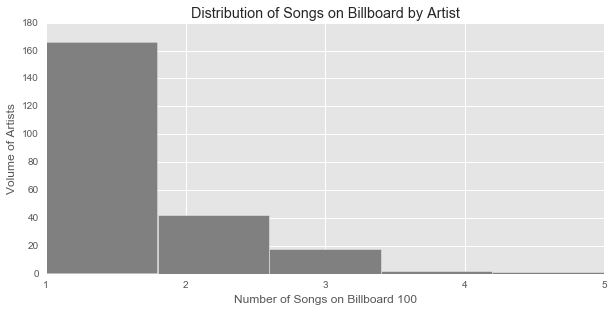

In [39]:
#wanted to see distribution of how many songs a single artist has on the charts
pd.Series(artist_song_count["track_count"]).hist(figsize = (10,4.5), bins = 5, color = "grey").set_xlim(1,5)
ax = plt.gca()
ax.xaxis.set_ticks([1.0, 2.0, 3.0, 4.0, 5.0])
ax.set_title("Distribution of Songs on Billboard by Artist")
ax.set_xlabel("Number of Songs on Billboard 100")
ax.set_ylabel("Volume of Artists")
plt.show()

This shows that the bulk of artists can get songs only once on the Billboard. The max songs that an artist has gotten on the list in the year was 5, with only one artist getting it. 

In [40]:
bb.loc[bb["artist.inverted"] == "Jay-Z"]

,artist.inverted,track,song_seconds,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,x4th.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
57,Jay-Z,I Just Wanna Love U (Give It 2 Me),230,Rap,2000-10-28,2000-12-30,58,45,35,26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,Jay-Z,Big Pimpin',235,Rap,2000-04-22,2000-07-08,69,52,39,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192,Jay-Z,Anything,221,Rap,2000-02-26,2000-03-11,72,58,55,55,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
226,Jay-Z,Do It Again (Put Ya Hands Up),227,Rap,2000-01-15,2000-01-29,95,68,65,65,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,Jay-Z,Hey Papi,220,Rap,2000-08-12,2000-10-07,98,100,98,94,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
bb_long.loc[bb_long["artist.inverted"] == "Jay-Z"].sort_values("rank").head()

,artist.inverted,track,song_seconds,genre,date.entered,date.peaked,week_from_entered,rank
2910,Jay-Z,I Just Wanna Love U (Give It 2 Me),230,Rap,2000-10-28,2000-12-30,10,11.0
3861,Jay-Z,I Just Wanna Love U (Give It 2 Me),230,Rap,2000-10-28,2000-12-30,13,12.0
3227,Jay-Z,I Just Wanna Love U (Give It 2 Me),230,Rap,2000-10-28,2000-12-30,11,12.0
3544,Jay-Z,I Just Wanna Love U (Give It 2 Me),230,Rap,2000-10-28,2000-12-30,12,12.0
2593,Jay-Z,I Just Wanna Love U (Give It 2 Me),230,Rap,2000-10-28,2000-12-30,9,13.0


Jay-Z is a bit of an exception being a Rap artist, which is contrary to what is actually genre with the most hits on the Billboard. 
It's also worth noting that the the highest rank that Jay-Z has gotten is only 11, not breaking the top 10 rank.

In [42]:
genre_song_count = pd.pivot_table(artist_song_count, index = ["genre"], values = ["track_count"], aggfunc=sum).sort_values("track_count", ascending = False)

In [43]:
genre_song_count = genre_song_count.reset_index()

In [44]:
genre_song_count = genre_song_count.sort_values("track_count", ascending = True)

In [45]:
genre_song_count

,genre,track_count
7,Gospel,1
8,Jazz,1
9,Reggae,1
6,Electronica,4
4,Latin,9
5,Pop,9
3,R&B,23
2,Rap,58
1,Country,74
0,Rock,137


In [46]:
genre_song_count["pct"] = genre_song_count["track_count"] / sum(genre_song_count["track_count"])

genre_song_count

,genre,track_count,pct
7,Gospel,1,0.003155
8,Jazz,1,0.003155
9,Reggae,1,0.003155
6,Electronica,4,0.012618
4,Latin,9,0.028391
5,Pop,9,0.028391
3,R&B,23,0.072555
2,Rap,58,0.182965
1,Country,74,0.233438
0,Rock,137,0.432177


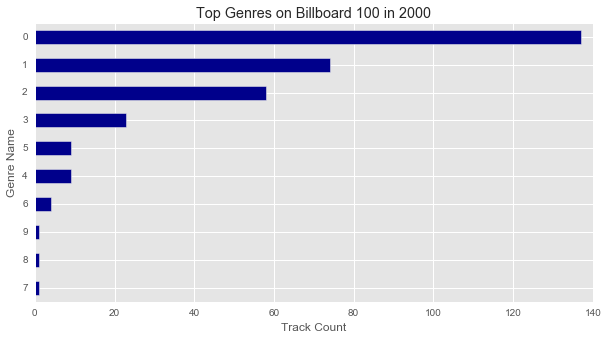

In [47]:
genre_song_count["track_count"].plot(kind = "barh", figsize = (10,5), color = "darkblue")

ax = plt.gca()
ax.set_title("Top Genres on Billboard 100 in 2000")
ax.set_ylabel("Genre Name")
ax.set_xlabel("Track Count")

plt.show()

I need help with changing the Track Count names.
Rock, by far, has the highest volume of hits. However, it could just be because there are more songs that are categorized as "Rock" than any of the other genres.

In [48]:
#artists with the most #1 songs
bb_long.loc[bb_long["rank"] == 1].head()

,artist.inverted,track,song_seconds,genre,date.entered,date.peaked,week_from_entered,rank
1588,Madonna,Music,225,Rock,2000-08-12,2000-09-16,6,1.0
1905,Madonna,Music,225,Rock,2000-08-12,2000-09-16,7,1.0
2222,Madonna,Music,225,Rock,2000-08-12,2000-09-16,8,1.0
2227,Sisqo,Incomplete,232,Rock,2000-06-24,2000-08-12,8,1.0
2230,"Aguilera, Christina",What A Girl Wants,198,Rock,1999-11-27,2000-01-15,8,1.0


In [50]:
#pulls all instances of #1, not unique 
bb_long_ones = bb_long.loc[bb_long["rank"]==1].groupby(["artist.inverted", "track", "song_seconds", "genre"])["rank"].count().to_frame("count_of_ones")

bb_long_ones = pd.DataFrame(bb_long_ones)

bb_long_ones.reset_index(inplace=True)

In [51]:
#this pulls how many weeks a song was #1 for
bb_long_ones.sort_values("count_of_ones", ascending = False)

,artist.inverted,track,song_seconds,genre,count_of_ones
5,Destiny's Child,Independent Women Part I,218,Rock,11
12,Santana,"Maria, Maria",258,Rock,10
13,Savage Garden,I Knew I Loved You,247,Rock,4
1,"Aguilera, Christina",Come On Over Baby (All I Want Is You),218,Rock,4
10,Madonna,Music,225,Rock,4
8,Janet,Doesn't Really Matter,257,Rock,3
6,Destiny's Child,Say My Name,271,Rock,3
7,"Iglesias, Enrique",Be With You,216,Latin,3
2,"Aguilera, Christina",What A Girl Wants,198,Rock,2
14,Sisqo,Incomplete,232,Rock,2


In [52]:
#Which artists have #1 singles and what genre were they
pd.pivot_table(bb_long_ones, index = ["artist.inverted", "genre"], values = ["track"], aggfunc=len).sort_values("track", ascending = False)

,,track
artist.inverted,genre,
"Aguilera, Christina",Rock,2
Destiny's Child,Rock,2
Aaliyah,Rock,1
"Carey, Mariah",Rock,1
Creed,Rock,1
"Iglesias, Enrique",Latin,1
Janet,Rock,1
Lonestar,Country,1
Madonna,Rock,1


In [53]:
bb_long_ones_genres = pd.pivot_table(bb_long_ones, index = ["genre"], values = ["track"], aggfunc = len).sort_values("track", ascending = False)

In [54]:
bb_long_ones_genres.reset_index(inplace = True)
bb_long_ones_genres

,genre,track
0,Rock,15
1,Country,1
2,Latin,1


In [55]:
bb_long_ones_genres = bb_long_ones_genres.rename (columns = {"track" : "count_of_tracks"})
bb_long_ones_genres

,genre,count_of_tracks
0,Rock,15
1,Country,1
2,Latin,1


In [56]:
bb_long_ones_genres["pct"] = bb_long_ones_genres["count_of_tracks"]/sum(bb_long_ones_genres["count_of_tracks"])

bb_long_ones_genres

,genre,count_of_tracks,pct
0,Rock,15,0.882353
1,Country,1,0.058824
2,Latin,1,0.058824


In [57]:
bb_long_ones_genres = bb_long_ones_genres.rename(columns = {"pct": "pct_ones"})
bb_long_ones_genres

,genre,count_of_tracks,pct_ones
0,Rock,15,0.882353
1,Country,1,0.058824
2,Latin,1,0.058824


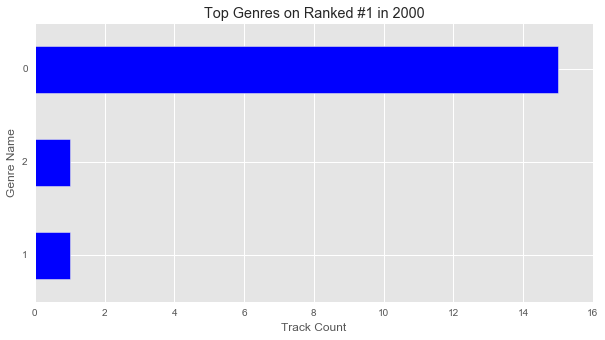

In [59]:
bb_long_ones_genres.sort_values("count_of_tracks", ascending = True, inplace = True)
bb_long_ones_genres["count_of_tracks"].plot(kind = "barh", figsize = (10,5), color = "blue")

ax = plt.gca()
ax.set_title("Top Genres on Ranked #1 in 2000")
ax.set_ylabel("Genre Name")
ax.set_xlabel("Track Count")

plt.show()

Jay-Z is an exception - the ranked 1 songs are even more likely to be Rock songs than the totals

In [60]:
merged_genres = pd.merge(genre_song_count, bb_long_ones_genres, how = "left")

In [62]:
merged_genres.sort_values("pct")
del merged_genres["track_count"]
del merged_genres["count_of_tracks"]
merged_genres

,genre,pct,pct_ones
0,Gospel,0.003155,NaN
1,Jazz,0.003155,NaN
2,Reggae,0.003155,NaN
3,Electronica,0.012618,NaN
4,Latin,0.028391,0.058824
5,Pop,0.028391,NaN
6,R&B,0.072555,NaN
7,Rap,0.182965,NaN
8,Country,0.233438,0.058824
9,Rock,0.432177,0.882353


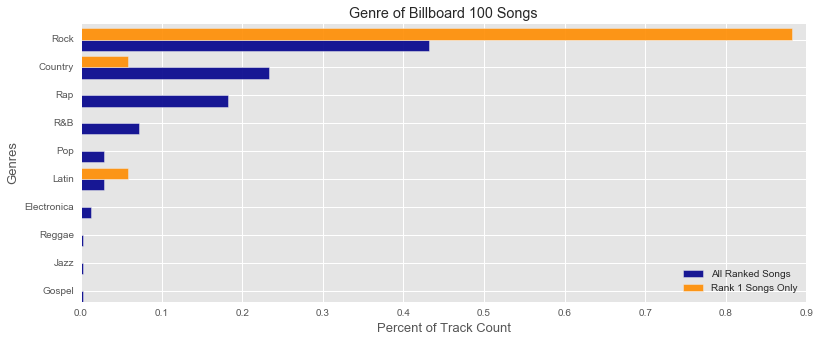

In [341]:
n_groups = 10

index = np.arange(n_groups)
bar_width = 0.4
plt.figure(figsize=(13,5))

opacity = 0.9
rects1 = plt.barh(index, merged_genres["pct"], bar_width, alpha=opacity, color='darkblue', label='All Ranked Songs')

rects2 = plt.barh(index + bar_width, merged_genres["pct_ones"], bar_width, alpha=opacity, color='darkorange', label='Rank 1 Songs Only')
plt.ylabel('Genres', size = 13)
plt.xlabel('Percent of Track Count', size = 13)
plt.title('Genre of Billboard 100 Songs')
plt.yticks(index + bar_width, ('Gospel', 'Jazz', 'Reggae', 'Electronica', 'Latin', "Pop", "R&B", "Rap", "Country", "Rock"))
plt.legend(loc = 4)
plt.show()

A song that is categorized as "Rock" disproportionately is likely to be a hit although there are a few individual exceptions to this rule (Country and Rap)

In [65]:
#what is the average length of a song that makes up a #1?
bb_long.sort_values("track").head()

,artist.inverted,track,song_seconds,genre,date.entered,date.peaked,week_from_entered,rank
7655,Nelly,(Hot S**t) Country Grammar,257,Rap,2000-04-29,2000-09-16,25,11.0
3217,Nelly,(Hot S**t) Country Grammar,257,Rap,2000-04-29,2000-09-16,11,37.0
11459,Nelly,(Hot S**t) Country Grammar,257,Rap,2000-04-29,2000-09-16,37,NaN
4802,Nelly,(Hot S**t) Country Grammar,257,Rap,2000-04-29,2000-09-16,16,17.0
22554,Nelly,(Hot S**t) Country Grammar,257,Rap,2000-04-29,2000-09-16,72,NaN


In [70]:
bb_long_peak_rank = pd.pivot_table(bb_long, index = ["track", "artist.inverted", "song_seconds", "genre", "date.entered", "date.peaked"], 
               values = ["rank"], aggfunc = min).sort_values("rank", ascending = True)

In [71]:
#this chart deduplicates the songs and only shows the peak rank of a song
bb_long_peak_rank.reset_index(inplace = True)
bb_long_peak_rank

,track,artist.inverted,song_seconds,genre,date.entered,date.peaked,rank
0,Thank God I Found You,"Carey, Mariah",254,Rock,1999-12-11,2000-02-19,1.0
1,Say My Name,Destiny's Child,271,Rock,1999-12-25,2000-03-18,1.0
2,Everything You Want,Vertical Horizon,241,Rock,2000-01-22,2000-07-15,1.0
3,Try Again,Aaliyah,243,Rock,2000-03-18,2000-06-17,1.0
4,Come On Over Baby (All I Want Is You),"Aguilera, Christina",218,Rock,2000-08-05,2000-10-14,1.0
5,Incomplete,Sisqo,232,Rock,2000-06-24,2000-08-12,1.0
6,Independent Women Part I,Destiny's Child,218,Rock,2000-09-23,2000-11-18,1.0
7,Bent,matchbox twenty,252,Rock,2000-04-29,2000-07-22,1.0
8,It's Gonna Be Me,N'Sync,190,Rock,2000-05-06,2000-07-29,1.0
9,Be With You,"Iglesias, Enrique",216,Latin,2000-04-01,2000-06-24,1.0


In [124]:
bb_long_peak_rank = bb_long_peak_rank.rename(columns = {"rank": "peak_rank"})

bb_long_peak_rank.head()

,track,artist.inverted,song_seconds,genre,date.entered,date.peaked,peak_rank
0,Thank God I Found You,"Carey, Mariah",254,Rock,1999-12-11,2000-02-19,1.0
1,Say My Name,Destiny's Child,271,Rock,1999-12-25,2000-03-18,1.0
2,Everything You Want,Vertical Horizon,241,Rock,2000-01-22,2000-07-15,1.0
3,Try Again,Aaliyah,243,Rock,2000-03-18,2000-06-17,1.0
4,Come On Over Baby (All I Want Is You),"Aguilera, Christina",218,Rock,2000-08-05,2000-10-14,1.0


In [432]:
rangetest = np.arange(min(bb_long_peak_rank["peak_rank"]), max(bb_long_peak_rank["peak_rank"]), 5.0)

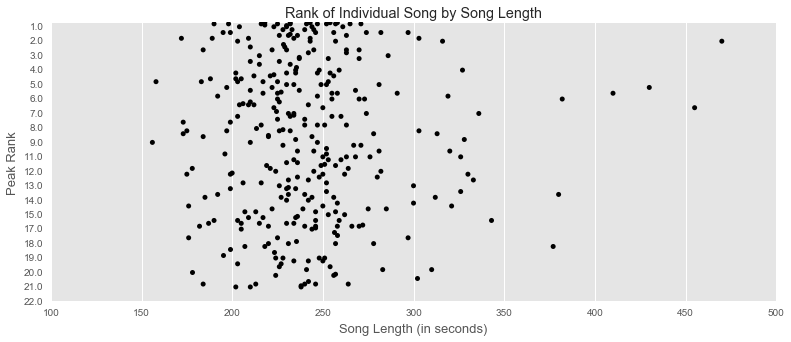

In [433]:
#numbers only go up to 22 - think more impactful chart uses histogram
plt.figure(figsize=(13,5))
ax = sns.swarmplot(x = bb_long_peak_rank["song_seconds"], y = bb_long_peak_rank["peak_rank"], orient = "h", color = "black")

ax.axes.set_title("Rank of Individual Song by Song Length")
ax.set_ylabel("Peak Rank", size = 13)
ax.set_xlabel("Song Length (in seconds)", size = 13)
ax.set_yticks(rangetest)


plt.show()

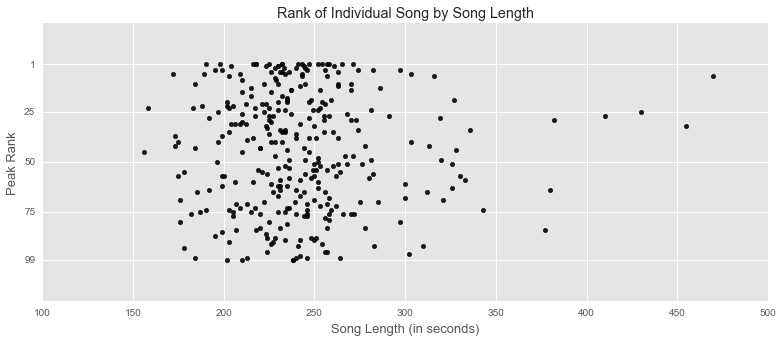

In [437]:
#this was a test to see if you could do the scatter in matplotlib
plt.figure(figsize=(13,5))

opacity = 0.9

plt.scatter(x = bb_long_peak_rank["song_seconds"], y = bb_long_peak_rank["peak_rank"], alpha=opacity, color='black')
plt.ylabel('Peak Rank', size = 13)
plt.xlabel('Song Length (in seconds)', size = 13)
plt.title("Rank of Individual Song by Song Length")
plt.yticks((1,25,50,75,99))
plt.gca().invert_yaxis()
plt.show()

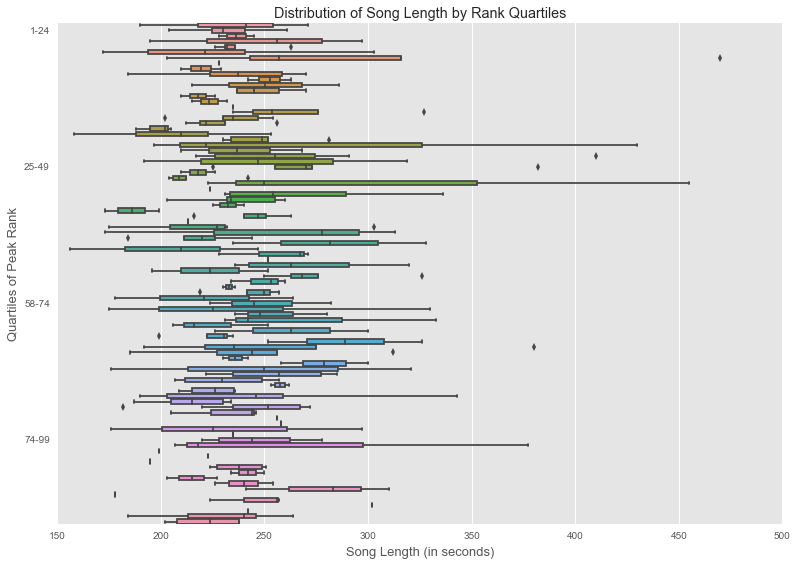

In [461]:
#final chart
yrank = np.arange(1,100,25)
ranklabels = ["1-24", "25-49", "58-74", "74-99"]

plt.figure(figsize=(13,9))
ax = sns.boxplot(x = bb_long_peak_rank["song_seconds"], y = bb_long_peak_rank["peak_rank"], orient = "h")
ax.axes.set_title("Distribution of Song Length by Rank Quartiles")
ax.set_ylabel("Quartiles of Peak Rank", size = 13)
ax.set_xlabel("Song Length (in seconds)", size = 13)
ax.set_yticks(yrank)
ax.set_yticklabels(ranklabels)
plt.show()

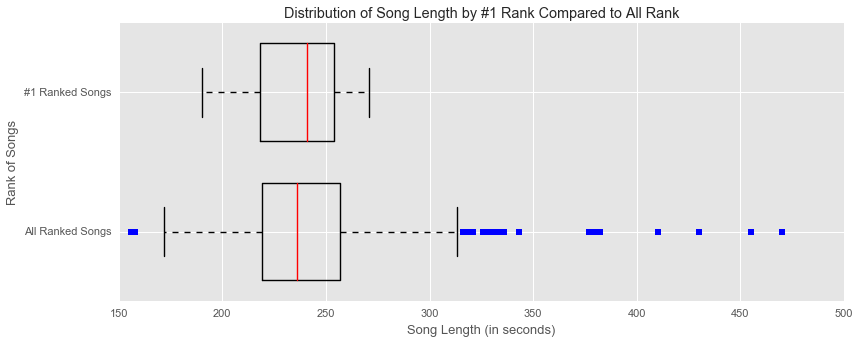

median of all songs is 236.0
median of number 1 songs is 241.0


In [418]:
#compare rank 1 vs all song lengths

song_lengths = [bb_long_peak_rank["song_seconds"], bb_long_ones["song_seconds"]]
fig = plt.figure(figsize=(13,5))
ax = P.boxplot(song_lengths, 0, "rs", 0, widths = .7)
P.title("Distribution of Song Length by #1 Rank Compared to All Rank")
P.xlabel("Song Length (in seconds)", fontsize = 13)
P.ylabel("Rank of Songs", fontsize = 13)
P.yticks([1, 2], ["All Ranked Songs", "#1 Ranked Songs"], fontsize = 11)
P.xticks(fontsize = 11)
P.setp(ax["boxes"], color = "black", linewidth = 1.4)
P.setp(ax["whiskers"], color = "black", linewidth = 1.4)
P.setp(ax['medians'], color = "red", linewidth = 1.4)
P.setp(ax['caps'], linewidth = 1.4)
plt.show()

print "median of all songs is %s" %np.median(bb_long_peak_rank["song_seconds"])
print "median of number 1 songs is %s" %np.median(bb_long_ones["song_seconds"])

In [371]:
#check what was longest song and rank
bb_long_peak_rank.loc[bb_long_peak_rank["song_seconds"].idxmax()]

track              Auld Lang Syne (The Millenium Mix)
artist.inverted                               Kenny G
song_seconds                                      470
genre                                            Jazz
date.entered                      1999-12-25 00:00:00
date.peaked                       2000-01-08 00:00:00
peak_rank                                           7
days_to_peak                         14 days 00:00:00
Name: 48, dtype: object

In [373]:
#check which song was the shortest song and rank
bb_long_peak_rank.loc[bb_long_peak_rank["song_seconds"].idxmin()]

track                       www.memory
artist.inverted          Jackson, Alan
song_seconds                       156
genre                          Country
date.entered       2000-11-04 00:00:00
date.peaked        2000-12-23 00:00:00
peak_rank                           45
days_to_peak          49 days 00:00:00
Name: 166, dtype: object

Rank doesn't seem to be immediately affected by the length of the song - there doesn't seem to be a direct correleation as shown by the charts shown above. 
The median also seems to be the same for all rank and even the #1 ranked songs.

In [143]:
#how long did it take a song to peak?
bb_long_peak_rank["days_to_peak"] = bb_long_peak_rank["date.peaked"] - bb_long_peak_rank["date.entered"]
bb_long_peak_rank.head()

,track,artist.inverted,song_seconds,genre,date.entered,date.peaked,peak_rank,days_to_peak
0,Thank God I Found You,"Carey, Mariah",254,Rock,1999-12-11,2000-02-19,1.0,70 days
1,Say My Name,Destiny's Child,271,Rock,1999-12-25,2000-03-18,1.0,84 days
2,Everything You Want,Vertical Horizon,241,Rock,2000-01-22,2000-07-15,1.0,175 days
3,Try Again,Aaliyah,243,Rock,2000-03-18,2000-06-17,1.0,91 days
4,Come On Over Baby (All I Want Is You),"Aguilera, Christina",218,Rock,2000-08-05,2000-10-14,1.0,70 days


In [266]:
bb_long_peak_rank.sort_values("days_to_peak", ascending = False).head(20)

,track,artist.inverted,song_seconds,genre,date.entered,date.peaked,peak_rank,days_to_peak
46,Higher,Creed,316,Rock,1999-09-11,2000-07-22,7.0,315 days
15,Amazed,Lonestar,265,Country,1999-06-05,2000-03-04,1.0,273 days
23,Kryptonite,3 Doors Down,233,Rock,2000-04-08,2000-11-11,3.0,217 days
158,Sexual (Li Da Di),Amber,278,Rock,1999-07-17,2000-02-12,42.0,210 days
32,I Wanna Know,Joe,297,Rock,2000-01-01,2000-07-01,4.0,182 days
11,With Arms Wide Open,Creed,232,Rock,2000-05-13,2000-11-11,1.0,182 days
2,Everything You Want,Vertical Horizon,241,Rock,2000-01-22,2000-07-15,1.0,175 days
22,Breathe,"Hill, Faith",244,Rap,1999-11-06,2000-04-22,2.0,168 days
47,(Hot S**t) Country Grammar,Nelly,257,Rap,2000-04-29,2000-09-16,7.0,140 days
104,A Puro Dolor (Purest Of Pain),Son By Four,210,Latin,2000-04-08,2000-08-19,26.0,133 days


In [262]:
#check max song to peak and rank
bb_long_peak_rank.loc[bb_long_peak_rank["days_to_peak"].idxmax()]

track                           Higher
artist.inverted                  Creed
song_seconds                       316
genre                             Rock
date.entered       1999-09-11 00:00:00
date.peaked        2000-07-22 00:00:00
peak_rank                            7
days_to_peak         315 days 00:00:00
Name: 46, dtype: object

In [264]:
#check min song to peak and rank
bb_long_peak_rank.loc[bb_long_peak_rank["days_to_peak"].idxmin()]

track                          Crybaby
artist.inverted          Carey, Mariah
song_seconds                       319
genre                             Rock
date.entered       2000-06-24 00:00:00
date.peaked        2000-06-24 00:00:00
peak_rank                           28
days_to_peak           0 days 00:00:00
Name: 112, dtype: object

In [479]:
#need to convert days to peak to integer
bb_long_peak_rank["days_to_peak"] = bb_long_peak_rank["days_to_peak"].apply(lambda x: str(x))

In [482]:
def daystopeakconvert(bloop):
    newbloop = bloop.replace(" days 00:00:00", "")
    return int(newbloop)

bb_long_peak_rank["days_to_peak"] = bb_long_peak_rank["days_to_peak"].apply(daystopeakconvert)

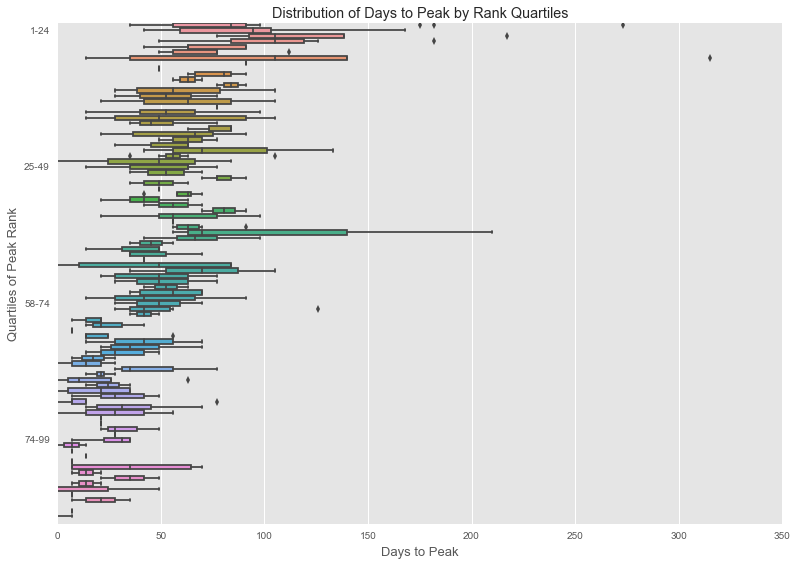

In [501]:
#chart looks nice and shows a clear pattern - but could do a more clear one
yrank = np.arange(1,100,25)
ranklabels = ["1-24", "25-49", "58-74", "74-99"]

plt.figure(figsize=(13,9))
ax = sns.boxplot(x = bb_long_peak_rank["days_to_peak"], y = bb_long_peak_rank["peak_rank"], orient = "h")
ax.axes.set_title("Distribution of Days to Peak by Rank Quartiles")
ax.set_ylabel("Quartiles of Peak Rank", fontsize = 13)
ax.set_xlabel("Days to Peak", fontsize = 13)
ax.set_yticks(yrank)
ax.set_yticklabels(ranklabels)

plt.show()

In [484]:
#this section begins breaking up the rank by quartiles
bb_long_peak_rank[bb_long_peak_rank["peak_rank"] == 25].index.tolist()

[99, 100, 101]

In [485]:
bb_long_peak_rank[bb_long_peak_rank["peak_rank"] == 2].index.tolist()
bb_long_peak_numberoneonly = bb_long_peak_rank[:17]
bb_long_peak_numberoneonly.tail()

,track,artist.inverted,song_seconds,genre,date.entered,date.peaked,peak_rank,days_to_peak
12,What A Girl Wants,"Aguilera, Christina",198,Rock,1999-11-27,2000-01-15,1.0,49
13,Doesn't Really Matter,Janet,257,Rock,2000-06-17,2000-08-26,1.0,70
14,"Maria, Maria",Santana,258,Rock,2000-02-12,2000-04-08,1.0,56
15,Amazed,Lonestar,265,Country,1999-06-05,2000-03-04,1.0,273
16,Music,Madonna,225,Rock,2000-08-12,2000-09-16,1.0,35


In [486]:
#this is a new table that includes the songs ranked from 1-24
bb_long_peak_rank_topquartile = bb_long_peak_rank[:99]
bb_long_peak_rank_topquartile.tail()

,track,artist.inverted,song_seconds,genre,date.entered,date.peaked,peak_rank,days_to_peak
94,I Wanna Be With You,"Moore, Mandy",252,Pop,2000-06-17,2000-08-12,24.0,56
95,Don't Think I'm Not,Kandi,230,Rock,2000-08-05,2000-10-07,24.0,63
96,I Like It,Sammie,249,Rock,2000-01-29,2000-04-15,24.0,77
97,Crash And Burn,Savage Garden,281,Rock,2000-04-08,2000-05-27,24.0,49
98,Broadway,Goo Goo Dolls,234,Rock,2000-04-22,2000-07-01,24.0,70


In [487]:
bb_long_peak_rank[bb_long_peak_rank["peak_rank"] == 50].index.tolist()

[176, 177]

In [488]:
#this is a new table that includes the songs from 25-49
bb_long_peak_rank_scndquartile = bb_long_peak_rank[100:176]

In [489]:
bb_long_peak_rank_scndquartile.head()

,track,artist.inverted,song_seconds,genre,date.entered,date.peaked,peak_rank,days_to_peak
100,Forgot About Dre,Dr. Dre,222,Rap,2000-01-22,2000-03-25,25.0,63
101,Untitled (How Does It Feel),D'Angelo,430,R&B,2000-01-22,2000-02-19,25.0,28
102,What'Chu Like,Da Brat,237,Rap,2000-06-03,2000-08-12,26.0,70
103,My First Love,Avant,268,Rock,2000-11-04,2000-12-16,26.0,42
104,A Puro Dolor (Purest Of Pain),Son By Four,210,Latin,2000-04-08,2000-08-19,26.0,133


In [490]:
bb_long_peak_rank_scndquartile.tail()

,track,artist.inverted,song_seconds,genre,date.entered,date.peaked,peak_rank,days_to_peak
171,None Of Ur Friends Business,Ginuwine,252,Rock,1999-12-11,2000-01-22,48.0,42
172,Someday Out Of The Blue,"John, Elton",281,Rock,2000-04-22,2000-05-06,49.0,14
173,What You Want,DMX,245,Rap,2000-07-01,2000-09-23,49.0,84
174,Nothing As It Seems,Pearl Jam,320,Rock,2000-05-13,2000-05-13,49.0,0
175,Unconditional,"Davidson, Clay",236,Country,2000-03-25,2000-06-17,49.0,84


In [491]:
#this is a new table that includes songs ranked from 50 - 74

bb_long_peak_rank_thrdquartile = bb_long_peak_rank.iloc[176:256]

In [492]:
bb_long_peak_rank_thrdquartile.head()

,track,artist.inverted,song_seconds,genre,date.entered,date.peaked,peak_rank,days_to_peak
176,The Best Of Me,Mya,252,Rock,2000-04-15,2000-05-20,50.0,35
177,Flowers On The Wall,"Heatherly, Eric",196,Country,2000-04-29,2000-08-12,50.0,105
178,I'll Be,"McEntire, Reba",263,Country,2000-05-13,2000-07-29,51.0,77
179,Dear Lie,TLC,276,Rock,2000-02-12,2000-03-04,51.0,21
180,Your Everything,"Urban, Keith",250,Country,2000-07-15,2000-09-16,51.0,63


In [494]:
bb_long_peak_rank_thrdquartile.tail()

,track,artist.inverted,song_seconds,genre,date.entered,date.peaked,peak_rank,days_to_peak
251,Another Nine Minutes,Yankee Grey,190,Country,2000-04-29,2000-05-20,74.0,21
252,Tricky Tricky,"Bega, Lou",203,Rock,2000-01-29,2000-02-05,74.0,7
253,"Live, Laugh, Love","Walker, Clay",246,Country,1999-12-04,2000-01-22,74.0,49
254,No Leaf Clover (Live),Metallica,343,Rock,2000-02-12,2000-03-11,74.0,28
255,Whistle While You Twurk,Ying Yang Twins,259,Rap,2000-03-18,2000-04-29,74.0,42


In [495]:
bb_long_peak_rank[bb_long_peak_rank["peak_rank"] == 75].index.tolist()

[256, 257, 258, 259, 260]

In [496]:
#this is a table for songs rank from 75 - 99
bb_long_peak_rank_frthquartile = bb_long_peak_rank[256:]

In [497]:
bb_long_peak_rank_frthquartile.head()

,track,artist.inverted,song_seconds,genre,date.entered,date.peaked,peak_rank,days_to_peak
256,How Many Licks?,Lil' Kim,230,Rap,2000-11-25,2000-12-02,75.0,7
257,When You Need My Love,"Worley, Darryl",215,Country,2000-06-17,2000-09-02,75.0,77
258,It's So Hard,Big Punisher,205,Rap,2000-04-22,2000-05-06,75.0,14
259,A Little Gasoline,"Clark, Terri",187,Country,2000-12-16,2000-12-16,75.0,0
260,A Country Boy Can Survive,"Brock, Chad",234,Country,2000-01-01,2000-01-08,75.0,7


In [498]:
bb_long_peak_rank_frthquartile.tail()

,track,artist.inverted,song_seconds,genre,date.entered,date.peaked,peak_rank,days_to_peak
312,Cherchez LaGhost,Ghostface Killah,184,R&B,2000-08-05,2000-08-05,98.0,0
313,Got Beef,"Eastsidaz, The",238,Rap,2000-07-01,2000-07-01,99.0,0
314,Freakin' It,"Smith, Will",238,Rap,2000-02-12,2000-02-12,99.0,0
315,Kernkraft 400,Zombie Nation,210,Rock,2000-09-02,2000-09-02,99.0,0
316,Toca's Miracle,Fragma,202,R&B,2000-10-28,2000-10-28,99.0,0


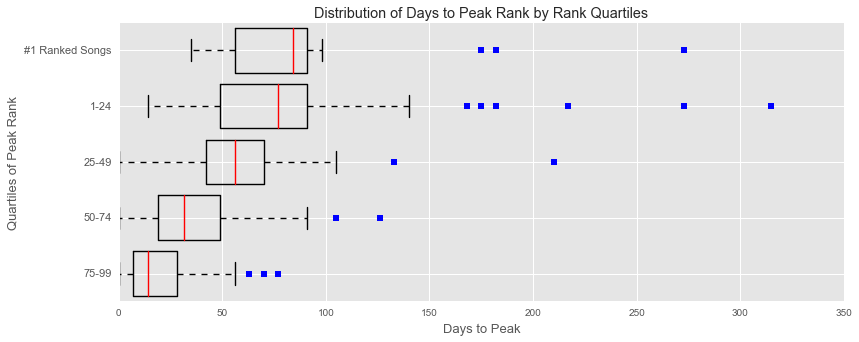

84.0
77.0
56.0
31.5
14.0


In [503]:
#updated chart with quartiles
days_top_peak = [bb_long_peak_numberoneonly["days_to_peak"], bb_long_peak_rank_topquartile["days_to_peak"], bb_long_peak_rank_scndquartile["days_to_peak"], bb_long_peak_rank_thrdquartile["days_to_peak"], bb_long_peak_rank_frthquartile["days_to_peak"]]
fig = plt.figure(figsize=(13,5))
ax = P.boxplot(days_top_peak, 0, "rs", 0, widths = .8)
P.title("Distribution of Days to Peak Rank by Rank Quartiles")
P.xlabel("Days to Peak", fontsize = 13)
P.ylabel("Quartiles of Peak Rank", fontsize = 13)
P.yticks([1, 2, 3, 4, 5], ["#1 Ranked Songs", "1-24", "25-49", "50-74", "75-99"], fontsize = 11)
P.setp(ax["boxes"], color = "black", linewidth = 1.4)
P.setp(ax["whiskers"], color = "black", linewidth = 1.4)
P.setp(ax['medians'], color = "red", linewidth = 1.4)
P.setp(ax['caps'], linewidth = 1.4)
plt.gca().invert_yaxis()
plt.show()

print np.median(bb_long_peak_numberoneonly["days_to_peak"])
print np.median(bb_long_peak_rank_topquartile["days_to_peak"])
print np.median(bb_long_peak_rank_scndquartile["days_to_peak"]) 
print np.median(bb_long_peak_rank_thrdquartile["days_to_peak"]) 
print np.median (bb_long_peak_rank_frthquartile["days_to_peak"])



Songs that are on the Billboard for longer tend to have a higher rank

In [219]:
#how long did it take a #1 song to peak?

bb_long_peak_numberoneonly.sort_values("days_to_peak", ascending = False)

,track,artist.inverted,song_seconds,genre,date.entered,date.peaked,peak_rank,days_to_peak
15,Amazed,Lonestar,265,Country,1999-06-05,2000-03-04,1.0,273 days
11,With Arms Wide Open,Creed,232,Rock,2000-05-13,2000-11-11,1.0,182 days
2,Everything You Want,Vertical Horizon,241,Rock,2000-01-22,2000-07-15,1.0,175 days
10,I Knew I Loved You,Savage Garden,247,Rock,1999-10-23,2000-01-29,1.0,98 days
3,Try Again,Aaliyah,243,Rock,2000-03-18,2000-06-17,1.0,91 days
8,It's Gonna Be Me,N'Sync,190,Rock,2000-05-06,2000-07-29,1.0,84 days
7,Bent,matchbox twenty,252,Rock,2000-04-29,2000-07-22,1.0,84 days
1,Say My Name,Destiny's Child,271,Rock,1999-12-25,2000-03-18,1.0,84 days
9,Be With You,"Iglesias, Enrique",216,Latin,2000-04-01,2000-06-24,1.0,84 days
13,Doesn't Really Matter,Janet,257,Rock,2000-06-17,2000-08-26,1.0,70 days


The days do seem relatively high for the ranked #1s

In [222]:
#which song has held #1 for the longest?
#what genre was it?

bb_long.sort_values("track", inplace = True)

In [279]:
bb_long_ones.sort_values("count_of_ones", ascending = False)

,artist.inverted,track,song_seconds,genre,count_of_ones
5,Destiny's Child,Independent Women Part I,218,Rock,11
12,Santana,"Maria, Maria",258,Rock,10
13,Savage Garden,I Knew I Loved You,247,Rock,4
1,"Aguilera, Christina",Come On Over Baby (All I Want Is You),218,Rock,4
10,Madonna,Music,225,Rock,4
8,Janet,Doesn't Really Matter,257,Rock,3
6,Destiny's Child,Say My Name,271,Rock,3
7,"Iglesias, Enrique",Be With You,216,Latin,3
2,"Aguilera, Christina",What A Girl Wants,198,Rock,2
14,Sisqo,Incomplete,232,Rock,2


Destiny's Child and Santana are the only ones that have been on the Billboard for 11/10 weeks. Both are also Rock genre.

## Step 4: Create a Problem Statement.

##### Having explored the data, come up with a problem statement for this data set. You can feel free to introduce data from any other source to support your problem statement, just be sure to provide a link to the origin of the data. Once again- be creative!

Studies have shown that the more that you hear a song, the more you hear a song, the more you'll start to enjoy the song (https://mic.com/articles/95260/how-the-music-industry-is-brainwashing-you-to-like-bad-pop-songs#.vIvkBhnwn). According to the "Mere Exposure Effect", "participants reported liking songs more the second and third times they were exposed to them".

What this means for our data set is potentially that the songs that have been on ranked on the Billboard for the longer periods of time, have likely had longer airplay, and thus exposure to the US population. We hypothesize then that the length of time that a song has spent on the Billboard is a stronger indicator of whether or not a song has a high rank, vs the other factors of genre and song length. 

## Step 5: Brainstorm your Approach.
##### In bullet-list form, provide a proposed approach for evaluating your problem statement. This can be somewhat high-level, but start to think about ways you can massage the data for maximum efficacy. 

- Rock is generally a strong indicator of rank - there's a disproportionate amount of Rock songs in the #1 song rank. 
- However, this feasibly could be because there are just a high volume of rock songs. There are also exceptions - the artists with the most songs on the Billboard were not Rock.
- Note here too that there are a series of songs in the data set that are classified as "Rock" but truly aren't which might account for the bias towards Rock songs.
- Song length was another factor that we examined - the songs varied widely with a range of 7:50, to 2:36. However, none at of the songs appear to show any sort of correlation along with rank. 
- Nor do the #1s differ vastly from the median of total all rank.
- However, when we look at the different quartiles of rank and their distribution of time to peak, we start to see a pattern of length. Songs that are on the Billboard for longer, tend to have a higher rank.
- Top ranked songs tend to build up - whereas its easier for songs on the lower rank to pop in and pop out quickly. 

## Step 6: Create a blog post with your code snippets and visualizations.
##### Data Science is a growing field, and the Tech industry thrives off of collaboration and sharing of knowledge. Blogging is a powerful means for pushing the needle forward in our field. Using your blogging platform of choice, create a post describing each of the 5 steps above. Rather than writing a procedural text, imagine you're describing the data, visualizations, and conclusions you've arrived at to your peers. Aim for a minimum of 500 words. 

https://yoyoyokatty.github.io/2016/bb-project2/

## BONUS: The Content Managers working for the Podcast Publishing Company have recognized you as a thought leader in your field. They've asked you to pen a white paper (minimum 500 words) on the subject of 'What It Means To Have Clean Data'. This will be an opinion piece read by a wide audience, so be sure to back up your statements with real world examples or scenarios.

##### Hint: To get started, look around on the internet for articles, blog posts, papers, youtube videos, podcasts, reddit discussions, anything that will help you understand the challenges and implications of dealing with big data. This should be a personal reflection on everything you've learned this week, and the learning goals that have been set out for you going forward. 